# TP 2 : Analyse exploratoire des données (EDA)

# ---

**Objectif :** Ce notebook permet d'analyser un jeu de données en appliquant des techniques d'analyse exploratoire :

- Statistiques descriptives
- Analyse univariée et bivariée
- Tests de corrélation
- Visualisations graphiques

## 0. Importation des bibliothèques et des données

In [2]:
# ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage des graphiques
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

# Charger le jeu de données fictif (remplacez par votre fichier)
source_path_complete = "/content/fagor.xlsx"  # Remplacer avec le chemin réel du fichier
df = pd.read_excel(source_path_complete)

# Afficher les premières lignes
print("Aperçu des données :")
print(df.head())
print("\nDimensions des données :", df.shape)
print("\nAperçu des types des données : \n\n", df.dtypes)

# Sélectionner les variables
variables = ['Re', 'n', 't', 'E', 'R1', 'R3', 'Alpha', 'Gap']
print(f"Variables du plan expérimental: {variables}")

# ---

Aperçu des données :
   StdOrder     Re     n    t   R1    R3  Alpha   Gap       E  Angelua 0  Angelua 1  SPRINGBACK (DEG)
0         1  125.0  0.12  0.4  1.0  0.25     45  0.02  185000  45.968908  45.330990          0.637918
1         2  440.0  0.12  0.4  1.0  0.25     45  0.02  185000  45.995117  43.684133          2.310984
2         3  125.0  0.30  0.4  1.0  0.25     45  0.02  185000  46.518375  45.210919          1.307456
3         4  440.0  0.30  0.4  1.0  0.25     45  0.02  185000  46.342357  42.456906          3.885451
4         5  125.0  0.12  0.8  1.0  0.25     45  0.02  185000  46.477059  45.962243          0.514816

Dimensions des données : (259, 12)

Aperçu des types des données : 

 StdOrder              int64
Re                  float64
n                   float64
t                   float64
R1                  float64
R3                  float64
Alpha                 int64
Gap                 float64
E                     int64
Angelua 0           float64
Angelua 1       

## 1. Statistiques descriptives
Méthodes :

* pandas.read_csv()
* describe()

In [4]:
# ---

print("\nStatistiques descriptives pour les variables quantitatives :")
print(df.describe())

# Statistiques pour les variables qualitatives
print("\nInformations sur les variables qualitatives :")
# print(df.describe(include=['object']))

df2 = pd.read_csv("/content/titanic.csv")
print(df2.describe(include=['object']))
# ---


Statistiques descriptives pour les variables quantitatives :
         StdOrder          Re          n           t          R1          R3       Alpha         Gap              E   Angelua 0   Angelua 1  SPRINGBACK (DEG)
count  259.000000  259.000000  259.00000  259.000000  259.000000  259.000000  259.000000  259.000000     259.000000  259.000000  259.000000        259.000000
mean   130.000000  282.500000    0.21000    0.600000    1.815637    3.807915   90.000000    0.060000  205000.000000   92.859344   89.014686          3.844658
std     74.911058  156.888347    0.08965    0.199223    1.860418    2.052815   44.825242    0.039845   19922.329804   45.107379   44.133942          3.974885
min      1.000000  125.000000    0.12000    0.400000    0.250000    0.250000   45.000000    0.020000  185000.000000   45.399682   35.907766          0.419846
25%     65.500000  125.000000    0.12000    0.400000    1.000000    2.625000   45.000000    0.020000  185000.000000   46.888365   45.163377         

## 2. Analyse univariée

Méthodes :     

* plt.figure()
* plt.subplots()
* seaborn.countplot()
* seaborn.barplot()
* seaborn.histplot()

Répartition du nombre d'observations par valeur


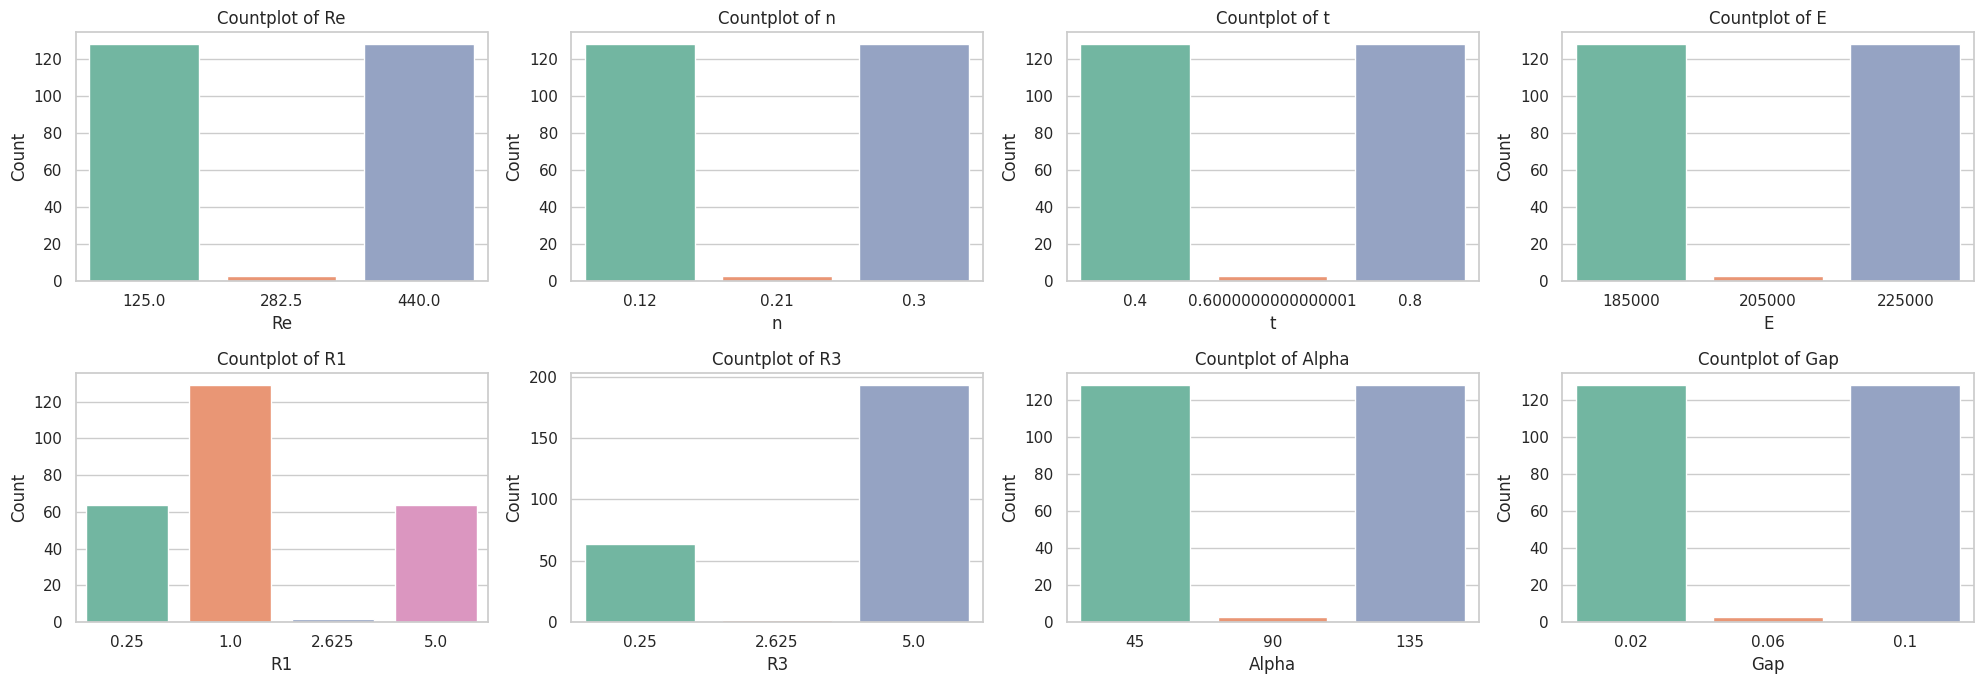

In [5]:
# Distribution en histogramme des variables non continues

def plot_distribution_count(df, col):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 7))
    axes = axes.flatten()
    for i, col in enumerate(col):
        sns.countplot(x=df[col], ax=axes[i], palette="Set2", hue=df[col], legend=False)
        axes[i].set_title(f'Countplot of {col}')
        axes[i].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

# ---

print("Répartition du nombre d'observations par valeur")
# variables = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
plot_distribution_count(df, variables)

# ---

Distribution des valeurs minimales et maximales par variable :


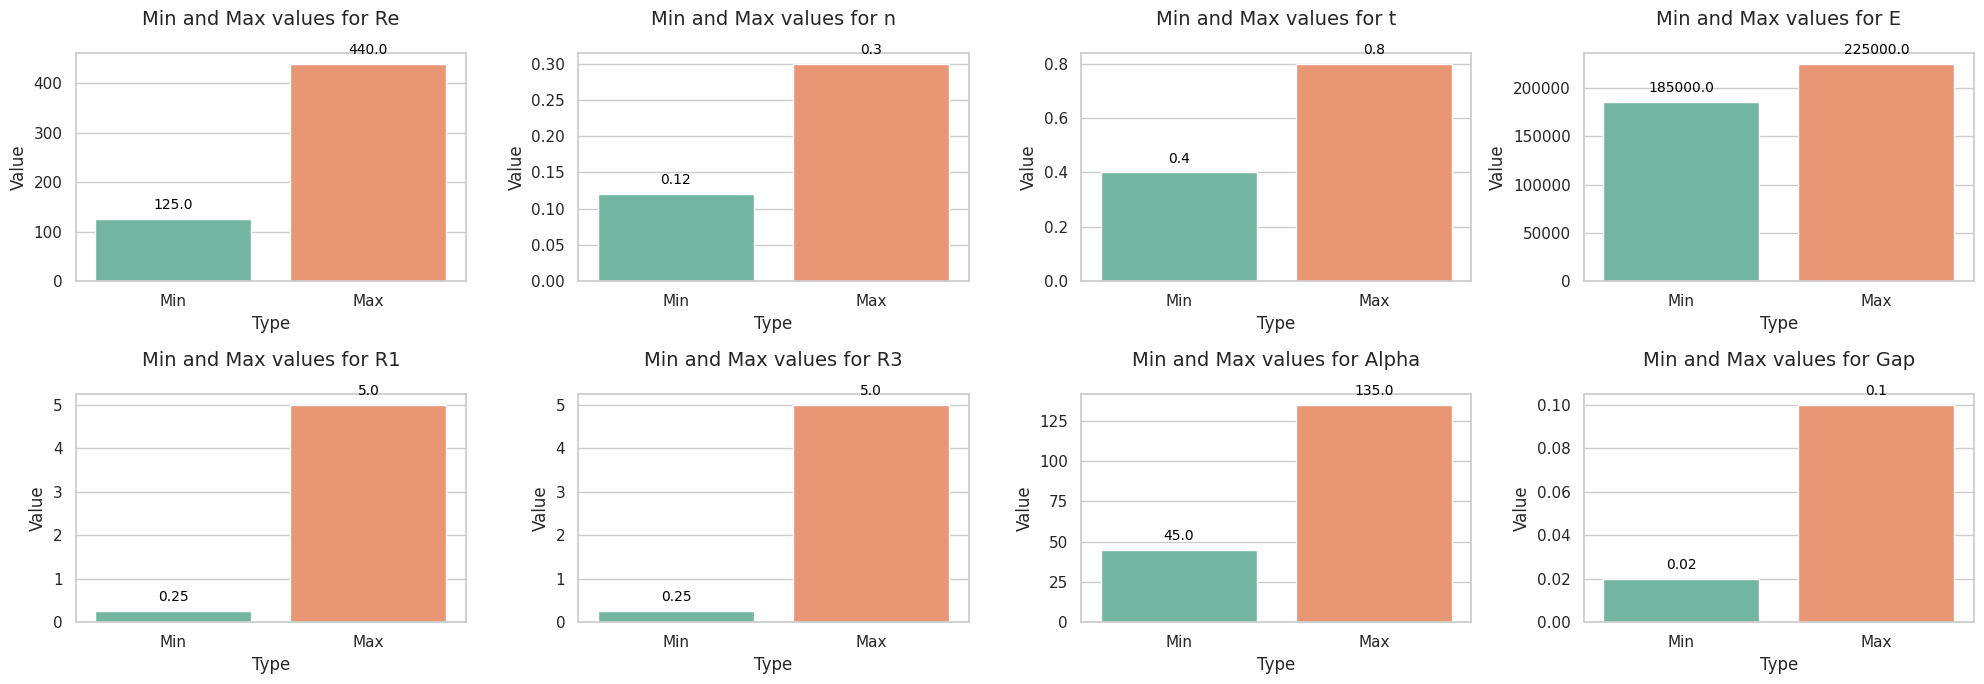

In [6]:
# Distribution des valeurs minimums/maximum

def plot_distribution_min_max(df, col):
    min_values = df[col].min()
    max_values = df[col].max()
    summary_df = pd.DataFrame({
        'Min': min_values,
        'Max': max_values
    }).reset_index()
    summary_df.columns = ['Column', 'Min', 'Max']

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 7))
    axes = axes.flatten()
    for i, col in enumerate(summary_df['Column']):
        sns.barplot(data=summary_df[summary_df['Column']==col].melt(id_vars='Column', value_vars=['Min', 'Max']),
                    x='variable',
                    y='value',
                    ax=axes[i],
                    palette='Set2',
                    hue='variable',
                    legend=False)
        for p in axes[i].patches:
             axes[i].annotate(str(p.get_height()),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center',
                              va='bottom',
                              fontsize=10,
                              color='black',
                              xytext=(0, 5),
                              textcoords='offset points')
        axes[i].set_title(f'Min and Max values for {col}', fontsize=14, pad=20)
        axes[i].set_ylabel('Value', fontsize=12)
        axes[i].set_xlabel('Type', fontsize=12)
    plt.tight_layout()
    plt.show()

# ---

print("Distribution des valeurs minimales et maximales par variable :")
df_numeric = df.select_dtypes(include=['number'])
plot_distribution_min_max(df_numeric, variables)

# ---

Distribution des valeurs des variables continues :


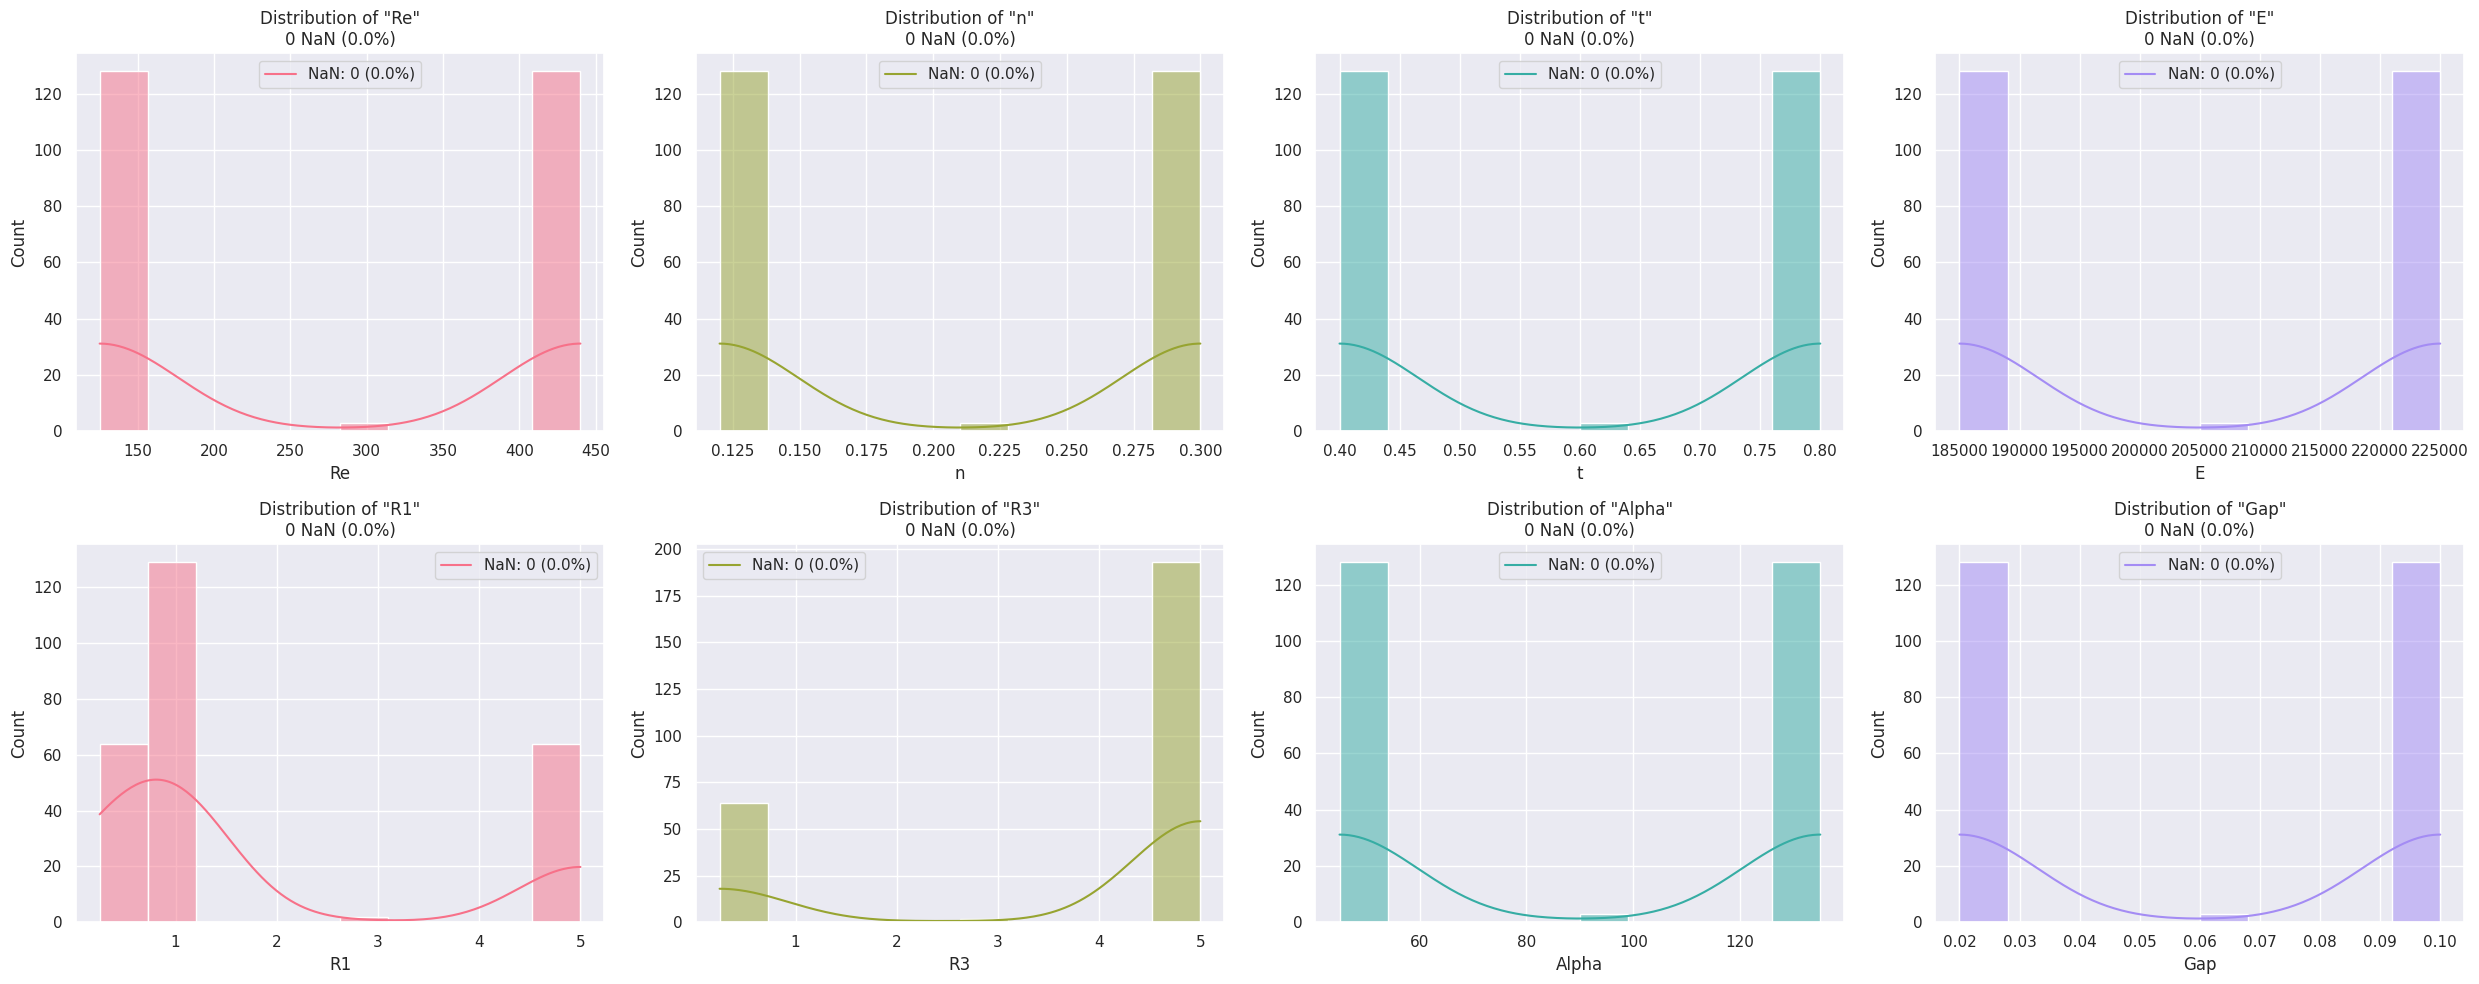

In [7]:
# Distribution des variables continues

def plot_histplot(df, col):
    palette = sns.color_palette("husl", 4)
    sns.set_theme()
    ncols = 4
    nrows = int(np.ceil(len(col) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(25, nrows * 5))
    axes = axes.flatten()

    for i, column in enumerate(col):
        sns.histplot(data=df, x=column, ax=axes[i], kde=True, color=palette[i % len(palette)])
        # Calculer le nombre de NaN
        n_nan = df[column].isna().sum()
        total = len(df[column])
        # Ajouter un titre avec le nombre de NaN
        axes[i].set(title=f'Distribution of "{column}"\n{n_nan} NaN ({n_nan/total:.1%})')
        axes[i].legend([f"NaN: {n_nan} ({n_nan/total:.1%})"])

    for j in range(len(col), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

# ---

print("Distribution des valeurs des variables continues :")
df_numeric = df.select_dtypes(include=['number'])
plot_histplot(df_numeric, variables)

# ---

## 3. Analyse bivariée

Méthodes :

* seaborn.scatterplot()
* seaborn.histplot()
* seaborn.PairGrid()
* seaborn.boxplot()


Scatter plot :


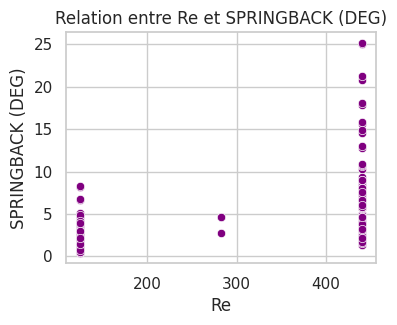

In [ ]:
# ---

# Scatter plot pour visualiser la relation entre deux variables quantitatives
print("\nScatter plot :")
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Re', y='SPRINGBACK (DEG)', data=df, color='purple')
plt.title("Relation entre Re et SPRINGBACK (DEG)")
plt.xlabel("Re")
plt.ylabel("SPRINGBACK (DEG)")
plt.show()

# ---

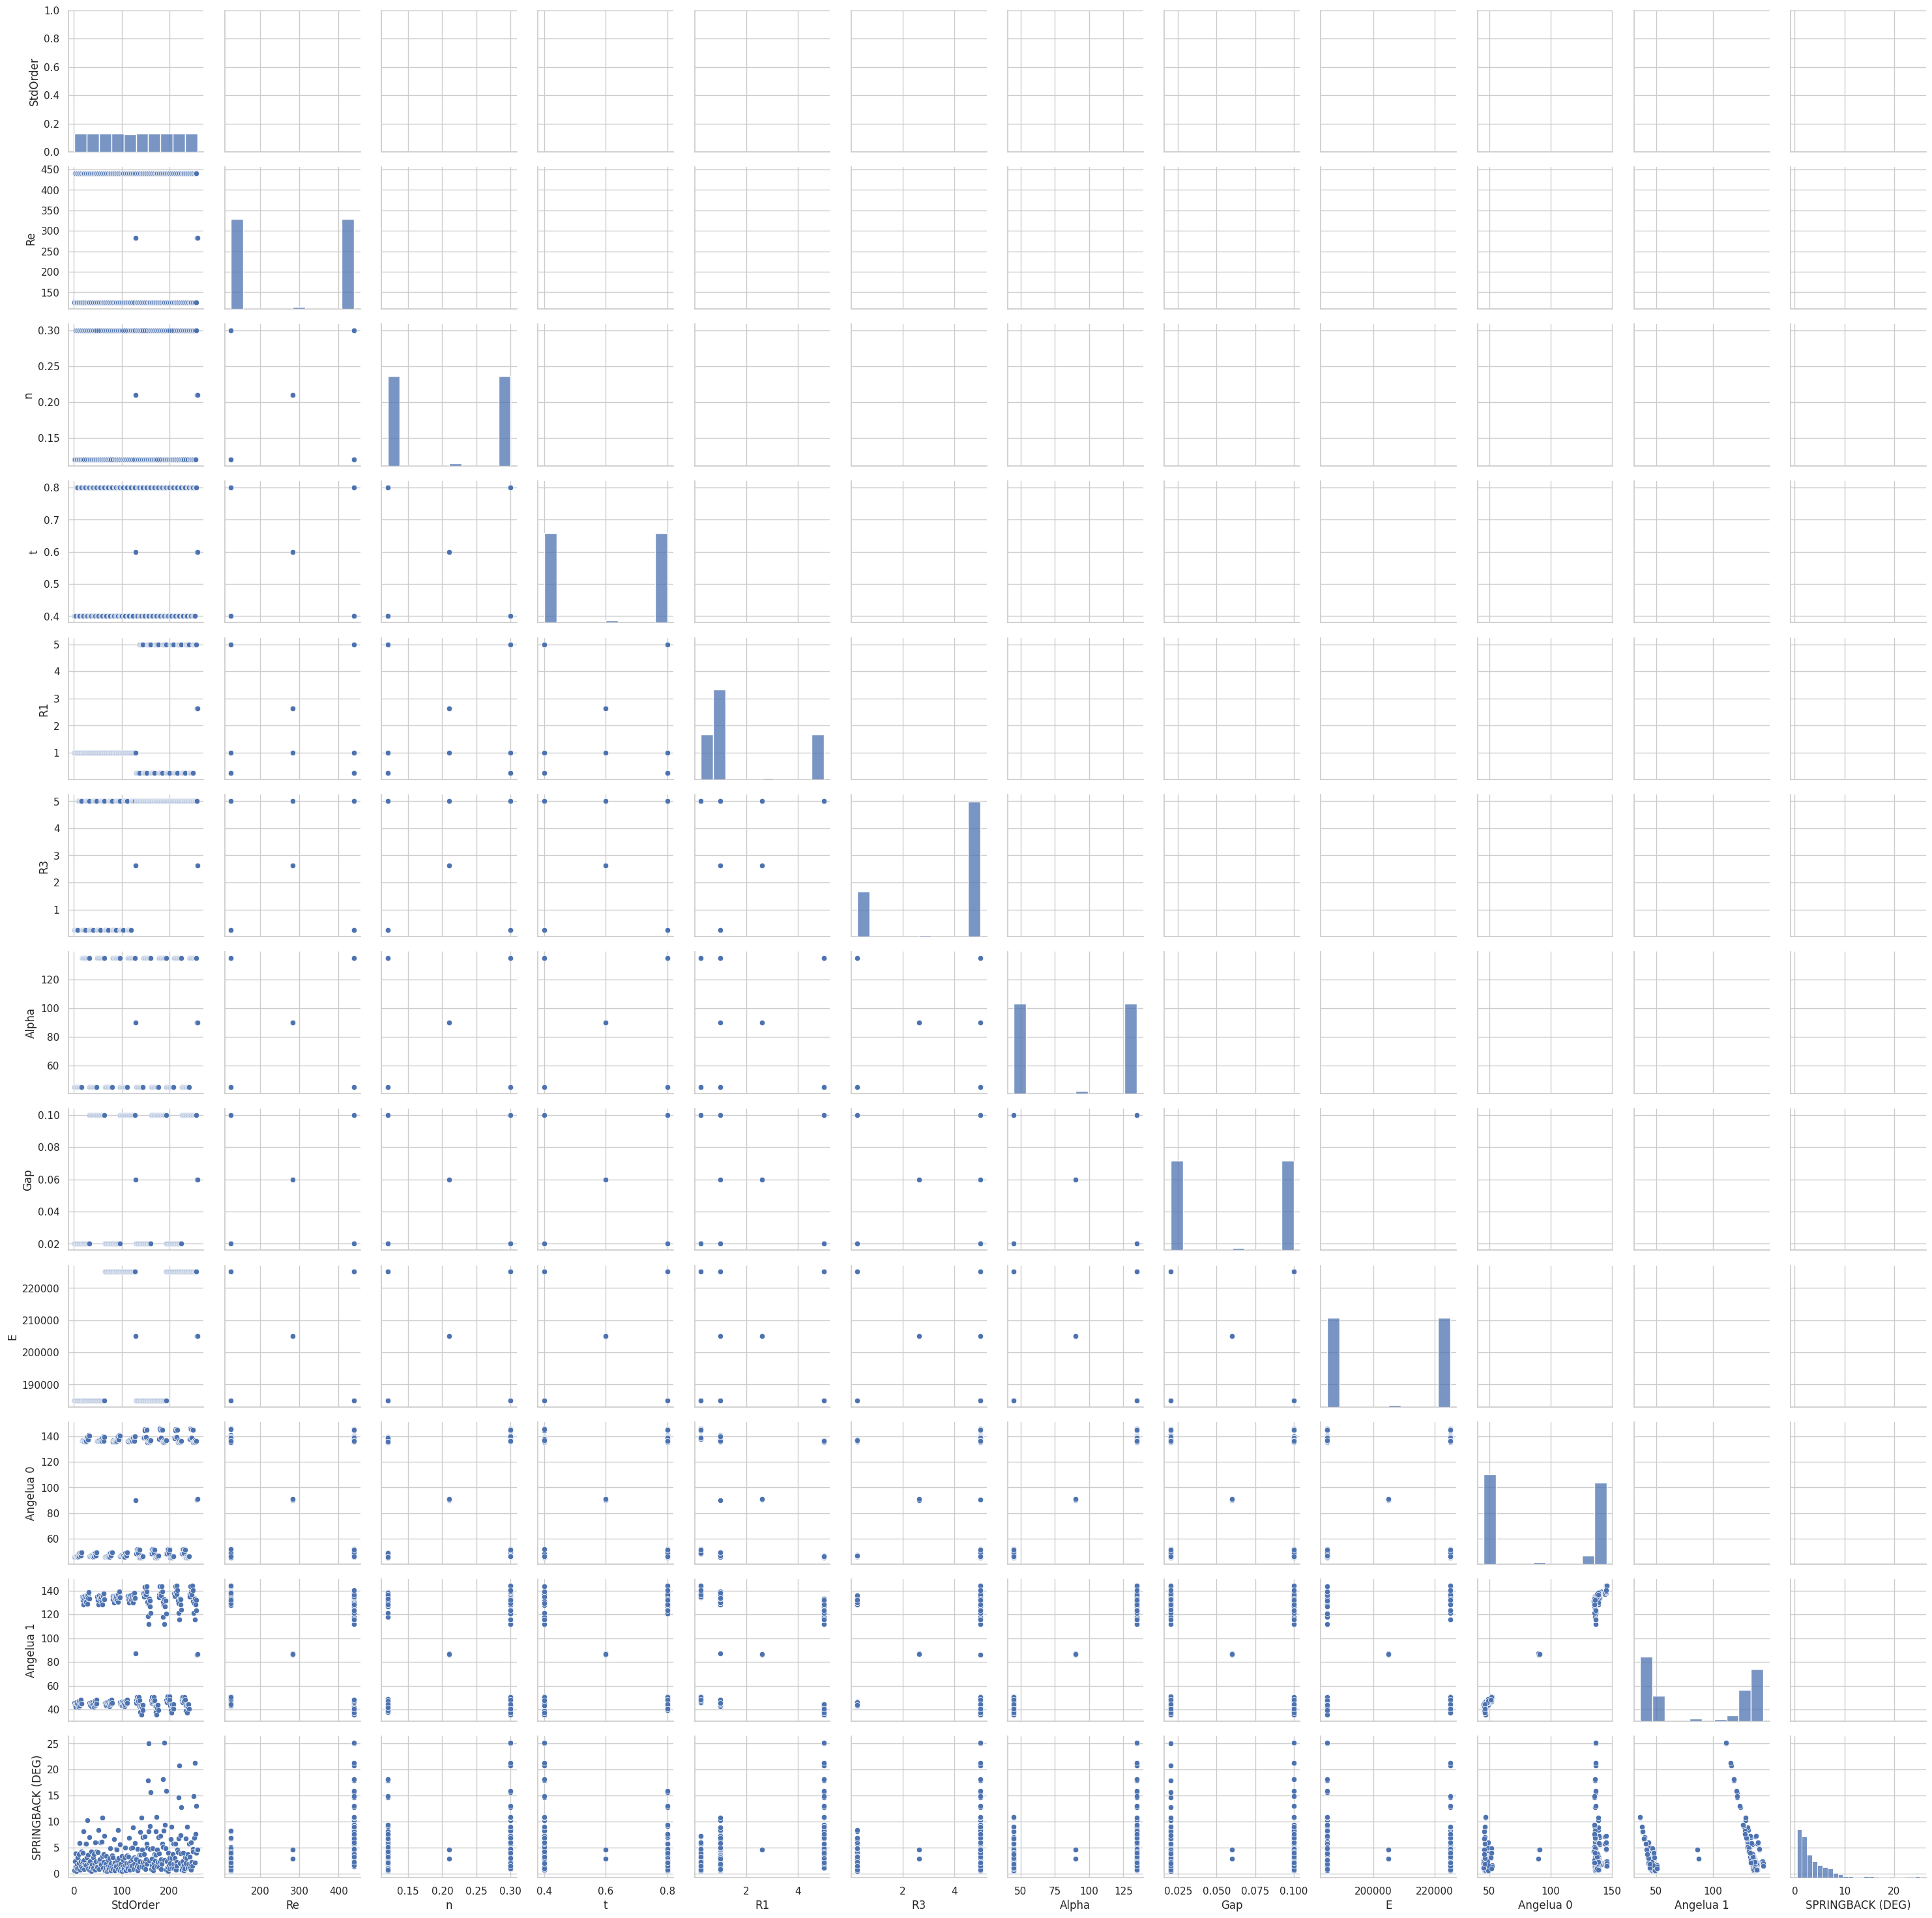

In [ ]:
# ---

# Scatter plot pour visualiser la relation entre deux variables quantitatives pour toutes les variables présentes

def plot_peer_relationships(df):
    g = sns.PairGrid(df)
    g.map_lower(sns.scatterplot)
    g.map_diag(sns.histplot)
    plt.show()

plot_peer_relationships(df)

# ---


Boxplot :


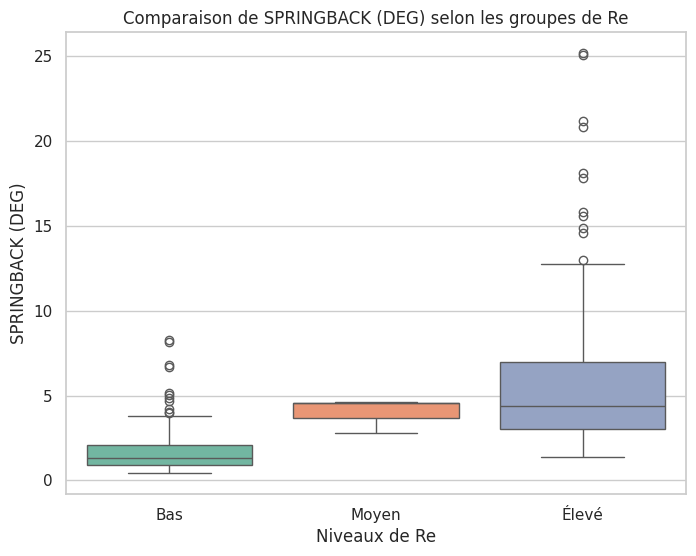

In [ ]:
# --- Boxplot : Comparaison d'une variable quantitative par groupes ---
# Discrétisation de la variable 'Re' en catégories
df['Re_group'] = pd.cut(df['Re'], bins=3, labels=["Bas", "Moyen", "Élevé"])

print("\nBoxplot :")
plt.figure(figsize=(8, 6))
sns.b oxplot(x='Re_group', y='SPRINGBACK (DEG)', data=df, palette="Set2", hue='Re', legend=False)
plt.title("Comparaison de SPRINGBACK (DEG) selon les groupes de Re")
plt.xlabel("Niveaux de Re")
plt.ylabel("SPRINGBACK (DEG)")
plt.show()

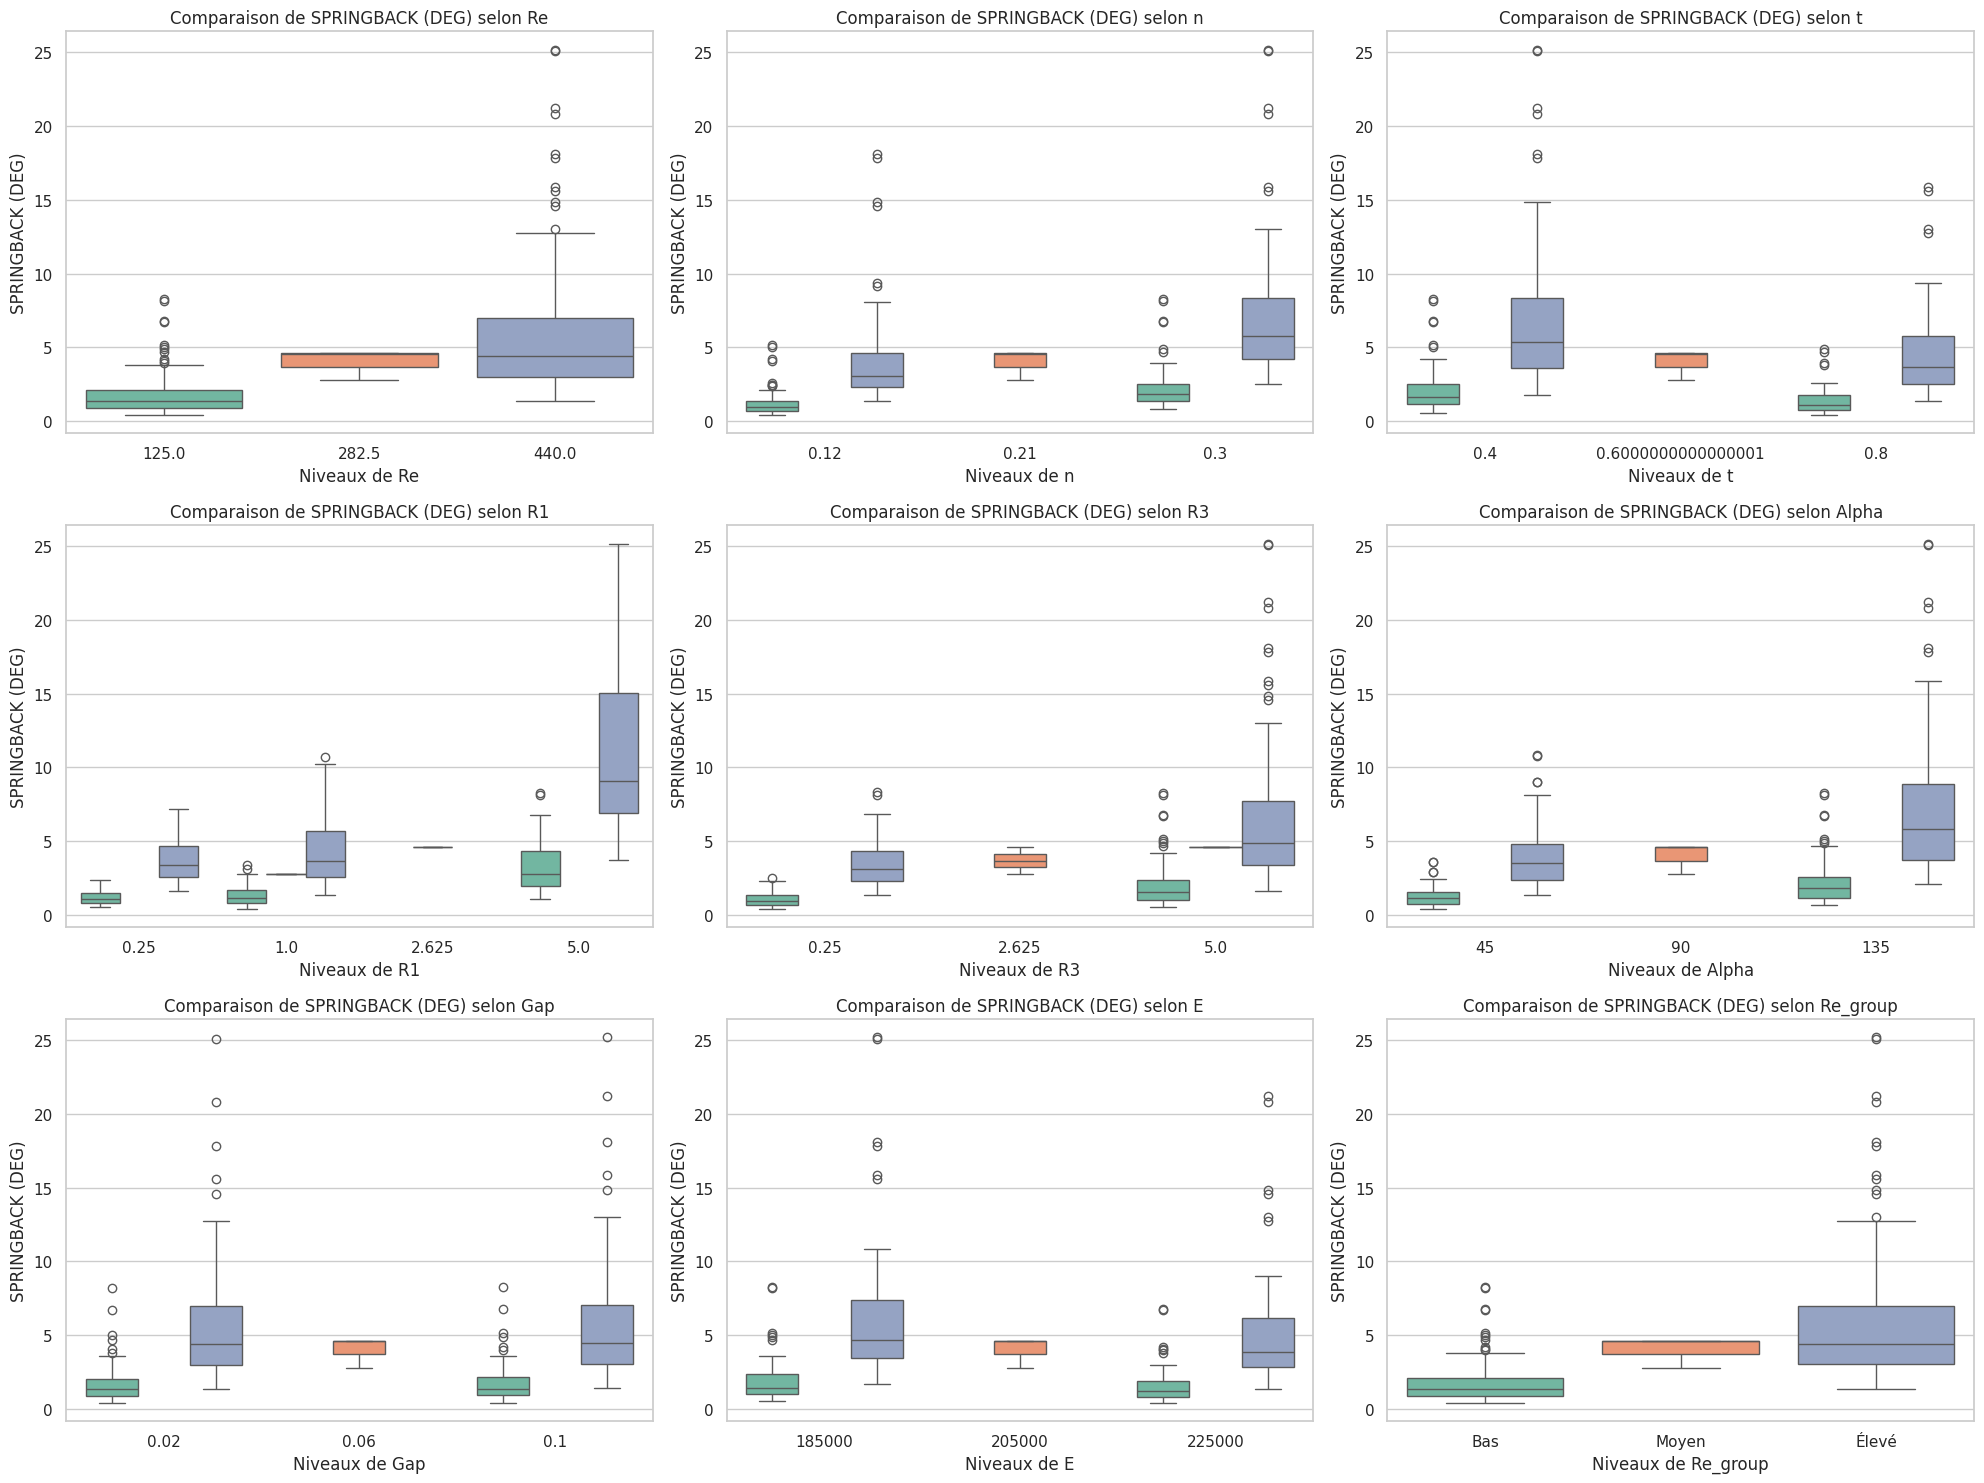

In [ ]:
plt.figure(figsize=(20, 15))
i = 1
for col in df.columns:
    if(col != 'SPRINGBACK (DEG)' and col != 'StdOrder' and col != 'Angelua 1' and col != 'Angelua 0'):
        plt.subplot(3, 3, i)
        i = i+1
        sns.boxplot(x=col, y='SPRINGBACK (DEG)', data=df, palette="Set2", hue='Re', legend=False)
        plt.title("Comparaison de SPRINGBACK (DEG) selon {0}".format(col))
        plt.xlabel("Niveaux de {0}".format(col))
        plt.ylabel("SPRINGBACK (DEG)")

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()

## 4. Test de corrélation

Méthodes :

* corr()
* seaborn.heatmap()


Matrice de corrélation :


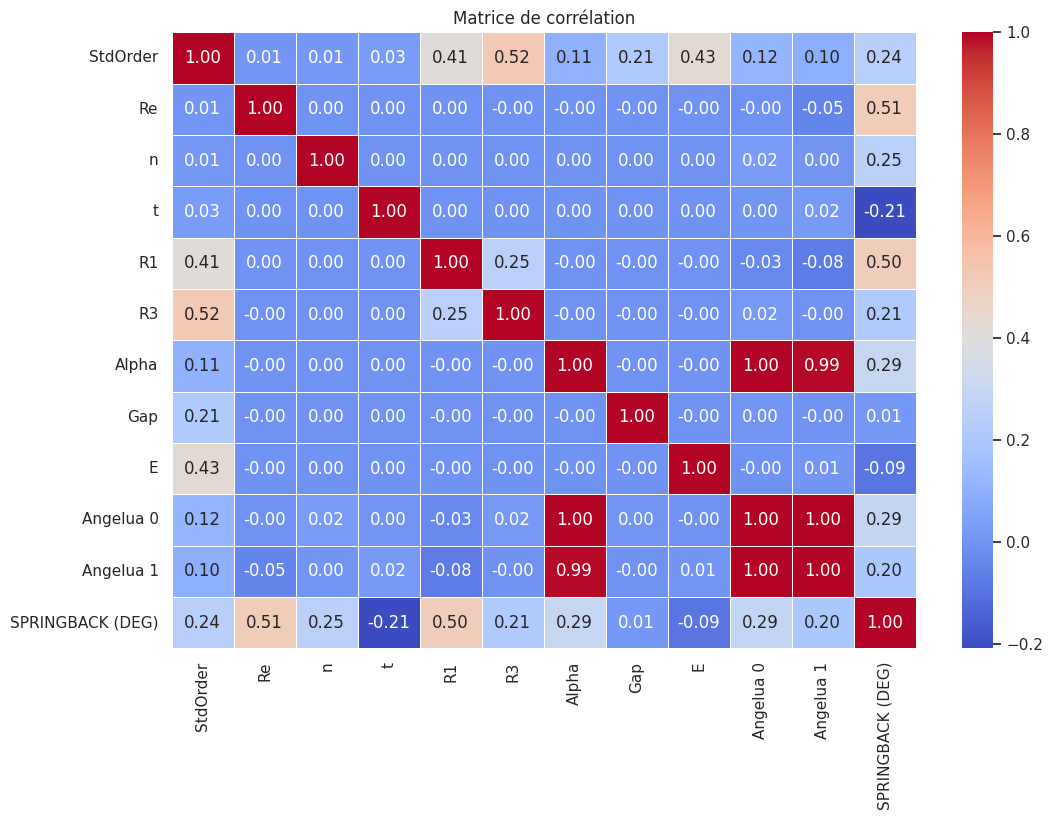

In [8]:
# ---

# Relation entre variables quantitatives
print("\nMatrice de corrélation :")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap="coolwarm",
            linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

# ---


Calcul des corrélations Pearson et Spearman :

Corrélation Pearson :
                  StdOrder            Re             n             t            R1            R3         Alpha           Gap             E  Angelua 0  Angelua 1  SPRINGBACK (DEG)
StdOrder          1.000000  6.648661e-03  1.329732e-02  2.659464e-02  4.127673e-01  5.248663e-01  1.063786e-01  2.127572e-01  4.255143e-01   0.118004   0.098806          0.242063
Re                0.006649  1.000000e+00  4.895163e-18  1.365751e-17  3.019390e-18 -2.052302e-18 -7.017706e-18 -8.811294e-18 -2.252082e-17  -0.000448  -0.046342          0.509454
n                 0.013297  4.895163e-18  1.000000e+00  2.484630e-17  2.360742e-16  2.832186e-16  5.482583e-17  3.811648e-17  1.613524e-16   0.024003   0.001974          0.250472
t                 0.026595  1.365751e-17  2.484630e-17  1.000000e+00  2.162328e-16  2.446474e-16  3.854941e-18  1.787240e-16  1.540990e-16   0.003040   0.021797         -0.207525
R1                0.412767  3.01939

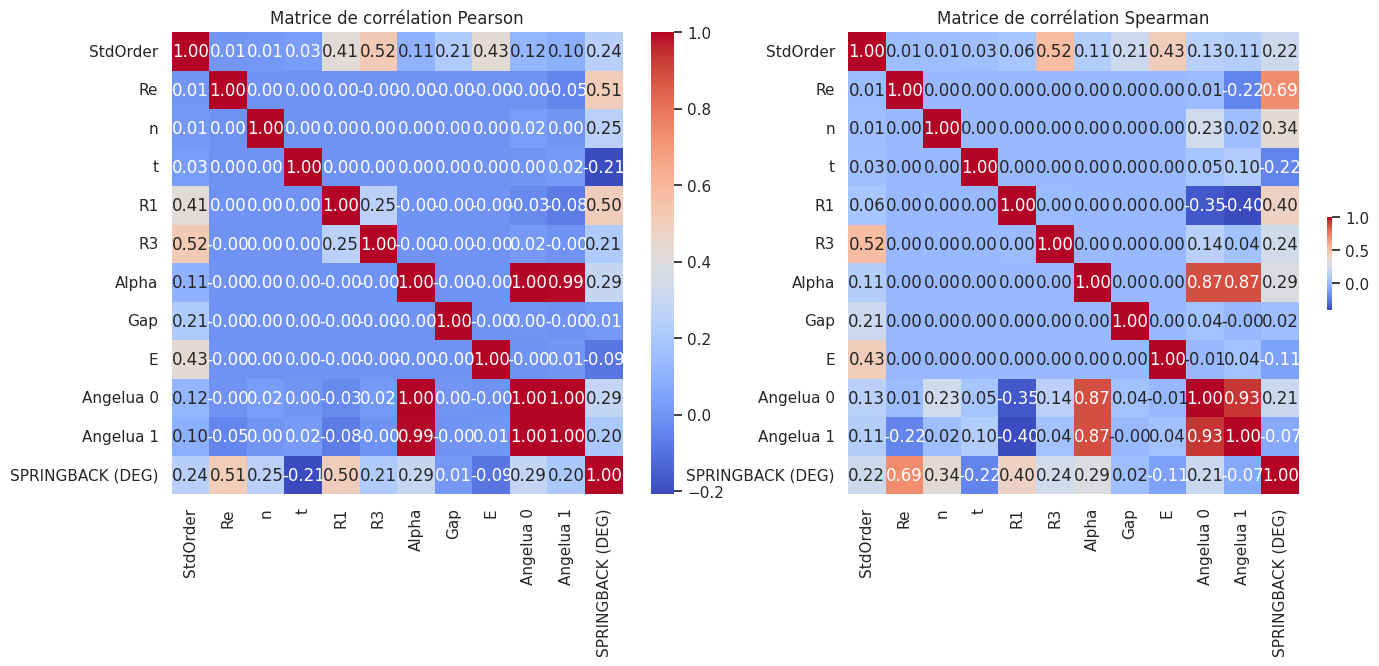

In [9]:
# ---

# Pearson et Spearman
print("\nCalcul des corrélations Pearson et Spearman :")
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

print("\nCorrélation Pearson :")
print(pearson_corr)

print("\nCorrélation Spearman :")
print(spearman_corr)

# Visualisation des deux matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(pearson_corr,
            annot=True,
            fmt='.2f',
            ax=axes[0],
            cmap="coolwarm")
axes[0].set_title("Matrice de corrélation Pearson")
sns.heatmap(spearman_corr,
            annot=True,
            fmt='.2f',
            ax=axes[1],
            cmap="coolwarm",
            cbar_kws={'shrink': 0.2})
axes[1].set_title("Matrice de corrélation Spearman")
plt.show()

# ---

### Test de corrélation et analyse des différences entre la corrélation de `Pearson` et de `Spearman `

Dans quel cas je peux avoir une corrélation de Spearman plus élevée que de Pearson ?

Corrélation Pearson : 0.63
Corrélation Spearman : 0.83


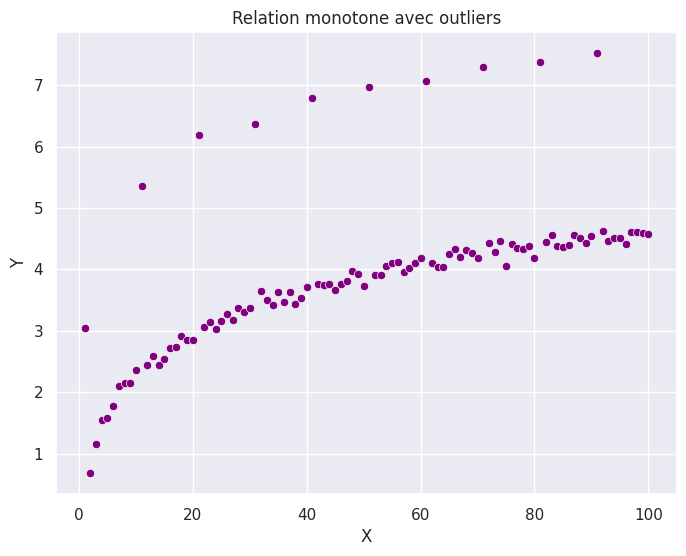

In [10]:
from scipy.stats import spearmanr, pearsonr

# Générer des données monotones non linéaires
np.random.seed(42)
x = np.linspace(1, 100, 100)
y = np.log(x) + np.random.normal(0, 0.1, 100)  # Relation logarithmique
y_outliers = y.copy()
y_outliers[::10] = y_outliers[::10] + 3  # Ajouter des outliers

# Calcul des corrélations
pearson_corr = pearsonr(x, y_outliers)[0]
spearman_corr = spearmanr(x, y_outliers)[0]

# Afficher les résultats
print(f"Corrélation Pearson : {pearson_corr:.2f}")
print(f"Corrélation Spearman : {spearman_corr:.2f}")

# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y_outliers, color='purple')
plt.title("Relation monotone avec outliers")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 5. Conclusion

Conclusion :
- Statistiques descriptives calculées.
- Relations entre variables explorées.
- Corrélations analysées avec visualisations.

Les étudiants peuvent maintenant interpréter les résultats et tirer des conclusions.

## Pour aller plus loin

Création de trois distributions pour interpréter les différences :

* Distribution normale
* Distribution asymétrique
* Distribution bimodale

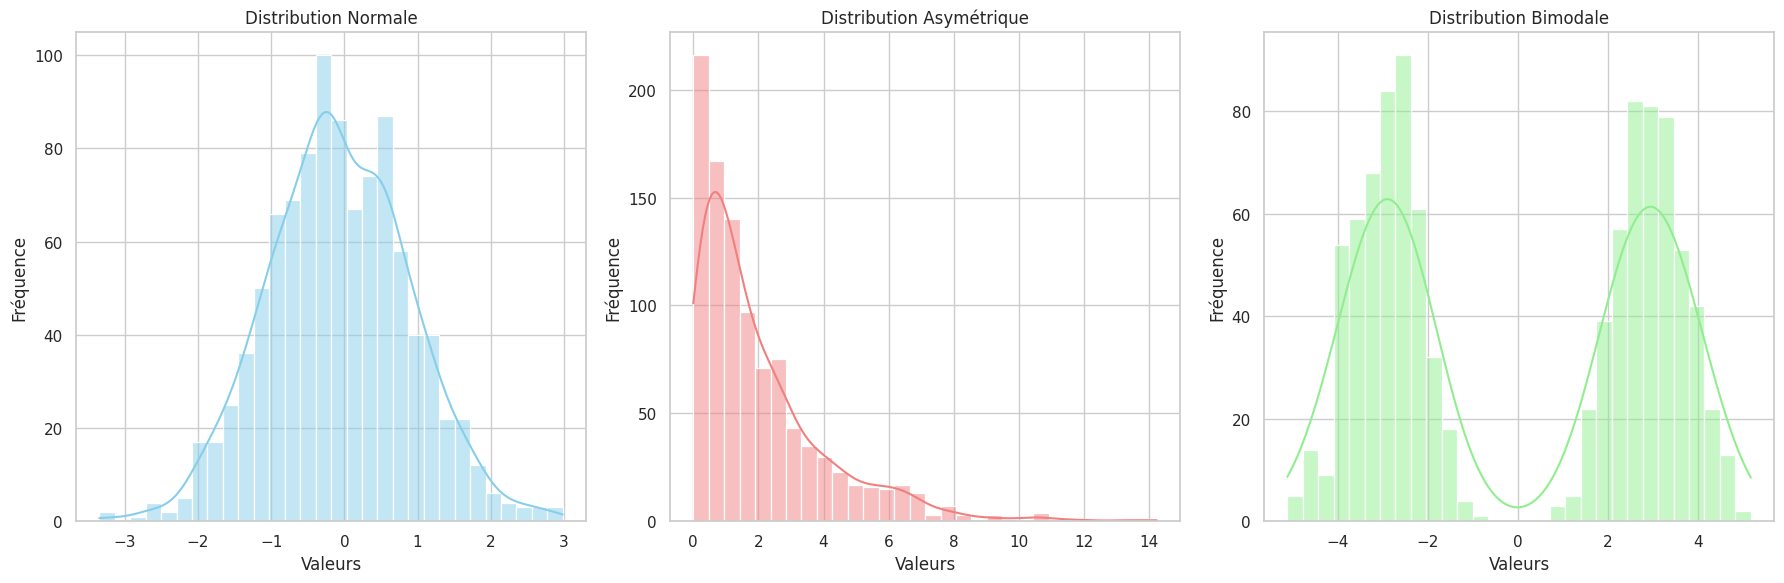

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres pour le style graphique
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# 1. Distribution normale
plt.subplot(1, 3, 1)
data_normal = np.random.normal(loc=0, scale=1, size=1000)  # loc=mean, scale=std, size=n
sns.histplot(data_normal, bins=30, kde=True, color="skyblue")
plt.title("Distribution Normale")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")

# 2. Distribution asymétrique (positivement skewed)
plt.subplot(1, 3, 2)
data_skewed = np.random.exponential(scale=2, size=1000)  # Distribution exponentielle (skewed)
sns.histplot(data_skewed, bins=30, kde=True, color="lightcoral")
plt.title("Distribution Asymétrique")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")

# 3. Distribution bimodale
plt.subplot(1, 3, 3)
data_bimodal = np.concatenate([
    np.random.normal(loc=-3, scale=0.8, size=500),  # Premier pic
    np.random.normal(loc=3, scale=0.8, size=500)   # Deuxième pic
])
sns.histplot(data_bimodal, bins=30, kde=True, color="lightgreen")
plt.title("Distribution Bimodale")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")

# Affichage global
plt.tight_layout()
plt.show()